In [13]:
from transformers import AutoTokenizer

tokenizer_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
string_arr = [
    "Only those who will risk going too far can possibly find out how far one can go.",
    "Baby shark, doo doo doo doo doo doo, Baby shark!"
]
inputs = tokenizer(string_arr, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  2069,  2216,  2040,  2097,  3891,  2183,  2205,  2521,  2064,
          4298,  2424,  2041,  2129,  2521,  2028,  2064,  2175,  1012,   102],
        [  101,  3336, 11420,  1010, 20160, 20160, 20160, 20160, 20160, 20160,
          1010,  3336, 11420,   999,   102,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]])}


In [14]:
from transformers import AutoModelForSequenceClassification

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
outputs = model(**inputs)
print(outputs.logits)

tensor([[ 0.9738, -0.8098],
        [-1.1881,  1.2323]], grad_fn=<AddmmBackward0>)


In [15]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[0.8561, 0.1439],
        [0.0816, 0.9184]], grad_fn=<SoftmaxBackward0>)


In [4]:
string_arr = [
    "Only those who will risk going too far can definitely find out how far one can go.",
    "Baby shark, doo doo doo doo doo doo, Baby shark!"
]
inputs = tokenizer(string_arr, padding=True, truncation=True, return_tensors="pt")

In [5]:
from transformers import AutoModelForSequenceClassification

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
outputs = model(**inputs)
print(outputs.logits)

tensor([[-2.0359,  1.9290],
        [-1.1881,  1.2323]], grad_fn=<AddmmBackward0>)


In [6]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[0.0186, 0.9814],
        [0.0816, 0.9184]], grad_fn=<SoftmaxBackward0>)


In [16]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier(
    [
        "Only those who will risk going too far can definitely find out how far one can go.",
        "Baby shark, doo doo doo doo doo doo, Baby shark!"
    ]
)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9813831448554993},
 {'label': 'POSITIVE', 'score': 0.918368935585022}]

In [20]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/d6/af/cb5ea6d1a9c83e715e29b45a598ebf542729cd216b43f5deefc27657bd38/tensorflow-2.13.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached tensorflow-2.13.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for h5py>=2.9.0 from https://files.pythonhosted.org/packages/4f/79/8e6e05bc4954ebdb8b9c587f780a11f28790585798bd15a8e4870cfc02bc/h5py-3.9.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached h5py-3.9.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
  Obtaining dependency information for keras<2.14,>=2.13.1 from https://files.pythonhosted.org/packages/2e/f3/19da7511b45e80216cbbd94

In [1]:
from transformers import TFAutoModel
tf_model = TFAutoModel.from_pretrained("xlm-roberta-base", from_pt=True)


2023-08-29 14:38:35.549618: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-29 14:38:35.552158: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-29 14:38:35.602025: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-29 14:38:35.603269: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-29 14:38:38.093845: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing TFXLMRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFXLMRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


In [6]:
from datasets import load_dataset
sentiment = load_dataset("poem_sentiment")
sentiment

DatasetDict({
    train: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 892
    })
    validation: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 105
    })
    test: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 104
    })
})

In [9]:
import pandas as pd

sentiment.set_format(type="pandas")
df = sentiment["train"][:]
df.head()

,id,verse_text,label
0,0,with pale blue berries. in these peaceful shad...,1
1,1,"it flows so long as falls the rain,",2
2,2,"and that is why, the lonesome day,",0
3,3,"when i peruse the conquered fame of heroes, an...",3
4,4,of inward strife for truth and liberty.,3


In [10]:
def label_int2str(row):
    return sentiment["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,id,verse_text,label,label_name
0,0,with pale blue berries. in these peaceful shad...,1,positive
1,1,"it flows so long as falls the rain,",2,no_impact
2,2,"and that is why, the lonesome day,",0,negative
3,3,"when i peruse the conquered fame of heroes, an...",3,mixed
4,4,of inward strife for truth and liberty.,3,mixed


In [11]:
labels = sentiment["train"].features["label"].names
print(labels)

['negative', 'positive', 'no_impact', 'mixed']


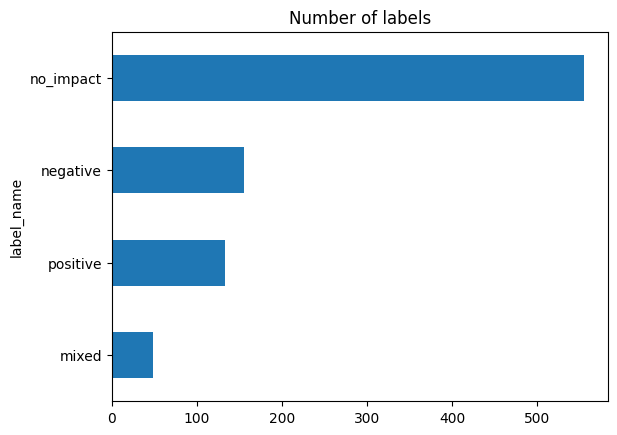

In [6]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Number of labels")
plt.show()

In [12]:
sentiment.reset_format()
from transformers import AutoTokenizer

model_name = "distilbert-base-uncased" # 第三天預設的distilbert-base-uncased-finetuned-sst-2-english用這個
tokenizer = AutoTokenizer.from_pretrained(model_name)
def tokenize(batch):
    return tokenizer(batch["verse_text"], padding=True, truncation=True)
sentiment_encoded = sentiment.map(tokenize, batched=True, batch_size=None)
next(iter(sentiment_encoded["train"])) #忘記這裡為什麼要用 next(iter())才能看到印出來的資料，可以回去看載入極巨大資料篇    

Map:   0%|          | 0/892 [00:00<?, ? examples/s]

Map:   0%|          | 0/105 [00:00<?, ? examples/s]

Map:   0%|          | 0/104 [00:00<?, ? examples/s]

{'id': 0,
 'verse_text': 'with pale blue berries. in these peaceful shades--',
 'label': 1,
 'input_ids': [101,
  2007,
  5122,
  2630,
  22681,
  1012,
  1999,
  2122,
  9379,
  13178,
  1011,
  1011,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]}

In [8]:
valid_ds = sentiment["validation"]
valid_ds["label"][:]

[2,
 1,
 2,
 0,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 0]

In [3]:
from transformers import AutoModelForSequenceClassification
import torch
model_name = "distilbert-base-uncased" # 第三天預設的distilbert-base-uncased-finetuned-sst-2-english用這個
num_labels = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = (AutoModelForSequenceClassification
        .from_pretrained(model_name, num_labels=num_labels
        ,id2label={"0": "negative",
                    "1": "positive",
                    "2": "no_impact",
                    "3": "mixed"}
        ,label2id={"negative": "0",
                    "positive": "1",
                    "no_impact": "2",
                    "mixed": "3"})
         .to(device))

2023-08-29 14:58:14.245603: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-29 14:58:14.293868: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-29 14:58:16.651406: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight']
You shou

In [11]:
!pip install transformers[torch]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  Obtaining dependency information for accelerate>=0.20.3 from https://files.pythonhosted.org/packages/4d/a7/05c67003d659a0035f2b3a8cf389c1d9645865aee84a73ce99ddab16682f/accelerate-0.22.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 1.1 MB/s eta 0:00:0000:0100:01m


In [13]:
!pip install accelerate -U

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [14]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(sentiment_encoded["train"]) // batch_size
model_name = "poem_model"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=40,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  label_names= labels,
                                  report_to = "azure_ml",
                                  logging_steps=logging_steps)

In [15]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [18]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=sentiment_encoded["train"],
                  eval_dataset=sentiment_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train()

RuntimeError: AzureMLCallback requires azureml to be installed. Run `pip install azureml-sdk`.

In [17]:
!pip install azureml-sdk

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  Obtaining dependency information for azureml-sdk from https://files.pythonhosted.org/packages/09/9b/f11aa1ca4691355db567f60c748c66678fc6c9eb5d4cf8aa50fb5ee6cc32/azureml_sdk-1.53.0-py3-none-any.whl.metadata
  Obtaining dependency information for azureml-core~=1.53.0 from https://files.pythonhosted.org/packages/e5/da/ed67a11a1baa8dff268ce71965fb936cd39e244ddd82134c3325f89fa7a8/azureml_core-1.53.0-py3-none-any.whl.metadata
  Obtaining dependency information for azureml-dataset-runtime[fuse]~=1.53.0 from https://files.pythonhosted.org/packages/7b/81/d73ae6369d7c5de9922ac82ba3c61284c35251ffbfa000166f8321326d87/azureml_dataset_runtime-1.53.0-py3-none-any.whl.metadata
  Ob